In [1]:
using QuantumDynamics
using Plots
using LinearAlgebra

Hoping to get rid of the units issue by integrating Unitful into QuantumDynamics package.

In [2]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

In [3]:
N = 5

5

In [4]:
    H0 = Matrix{ComplexF64}([
        4.018 0.058 -0.086 0.168 0.000
        0.058 4.017 -0.168 0.086 0.000
        -0.086 -0.168 5.043 0.000 0.000
        0.168 0.086 0.000 5.042 0.000
        0.000 0.000 0.000 0.000 4.006 
    ]) * 1000 * mev2au

5×5 Matrix{ComplexF64}:
    0.147667+0.0im   0.00213158+0.0im  …  0.00617423+0.0im       0.0+0.0im
  0.00213158+0.0im      0.14763+0.0im     0.00316062+0.0im       0.0+0.0im
 -0.00316062+0.0im  -0.00617423+0.0im            0.0+0.0im       0.0+0.0im
  0.00617423+0.0im   0.00316062+0.0im         0.1853+0.0im       0.0+0.0im
         0.0+0.0im          0.0+0.0im            0.0+0.0im  0.147226+0.0im

In [5]:
show(stdout, "text/plain", real.(H0))

5×5 Matrix{Float64}:
  0.147667     0.00213158  -0.00316062  0.00617423  0.0
  0.00213158   0.14763     -0.00617423  0.00316062  0.0
 -0.00316062  -0.00617423   0.185337    0.0         0.0
  0.00617423   0.00316062   0.0         0.1853      0.0
  0.0          0.0          0.0         0.0         0.147226

In [6]:
nsteps = 600
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (T[6] * 3.16683e-6) # T = 300K

1052.5772881188234

Simulation is very sensitive to time-stepping. NaNs get produced if you're not careful

In [7]:
dt = 0.1/au2fs 

4.134137457575099

In [8]:
Jw2 = SpectralDensities.DrudeLorentz(λ=100*invcm2au, γ=450*invcm2au, Δs=1.0)
ω = 0:0.0001:0.07
ωs2, cs2 = SpectralDensities.discretize(Jw2, 100)
plot(ω, Jw2.(ω), xlabel="ω", ylabel="J(ω)", title="Spectral Density", legend=false)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip580)" d="M330.459 1454.1 Q326.848 1454.1 325.019 1457.66 Q323.214 1461.2 323.214 1468.33 Q323.214 1475.44 325.019 1479.01 Q326.848 1482.55 330.459 1482.55 Q334.093 1482.55 335.899 1479.01 Q337.728 1475.44 337.728 1468.33 Q337.728 1461.2 335.899 1457.66 Q334.093 1454.1 330.459 1454.1 M330.459 1450.39 Q336.269 1450.39 339.325 1455 Q342.404 1459.58 342.404 1468.33 Q342.404 1477.06 339.325 1481.67 Q336.269 1486.25 330.459 1486.25 Q324.649 1486.25 321.57 1481.67 Q318.515 1477.06 318.515 1468.33 Q318.515 1459.58 321.57 1455 Q324.649 1450.39 330.459 1450.39 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip580)" d="M375.69 1454.1 Q372.079 1454.1 370.251 1457.66 Q368.445 1461.2 368.445 1468.33 Q368.445 1475.44 370.251 1479.01 Q372.079 1482.55 375.69 1482.55 Q379.325 1482.55 381.13 1479.01 Q382.959 1475.44 382.959 1468.33 Q382.959 1461.2 381.13 1457.66 Q379.325 1454.1 375.69 1454.1 M375.69 1450.39 Q381.501 1450.39 384.556 1455 Q387.635 1459.58 387.635 1468.33 Q387.635 1477.06 384.556 1481.67 Q381.501 1486.25 375.69 1486.25 Q369.88 1486.25 366.802 1481.67 Q363.746 1477.06 363.746 1468.33 Q363.746 1459.58 366.802 1455 Q369.88 1450.39 375.69 1450.39 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip580)" d="M405.852 1454.1 Q402.241 1454.1 400.413 1457.66 Q398.607 1461.2 398.607 1468.33 Q398.607 1475.44 400.413 1479.01 Q402.241 1482.55 405.852 1482.55 Q409.487 1482.55 411.292 1479.01 Q413.121 1475.44 413.121 1468.33 Q413.121 1461.2 411.292 1457.66 Q409.487 1454.1 405.852 1454.1 M405.852 1450.39 Q411.662 1450.39 414.718 1455 Q417.797 1459.58 417.797 1468.33 Q417.797 1477.06 414.718 1481.67 Q411.662 1486.25 405.852 1486.25 Q400.042 1486.25 396.963 1481.67 Q393.908 1477.06 393.908 1468.33 Q393.908 1459.58 396.963 1455 Q400.042 1450.39 405.852 1450.39 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip580)" d="M881.771 1454.1 Q878.16 1454.1 876.331 1457.66 Q874.526 1461.2 874.526 1468.33 Q874.526 1475.44 876.331 1479.01 Q878.16 1482.55 881.771 1482.55 Q885.405 1482.55 887.211 1479.01 Q889.04 1475.44 889.04 1468.33 Q889.04 1461.2 887.211 1457.66 Q885.405 1454.1 881.771 1454.1 M881.771 1450.39 Q887.581 1450.39 890.637 1455 Q893.715 1459.58 893.715 1468.33 Q893.715 1477.06 890.637 1481.67 Q887.581 1486.25 881.771 1486.25 Q875.961 1486.25 872.882 1481.67 Q869.827 1477.06 869.827 1468.33 Q869.827 1459.58 872.882 1455 Q875.961 1450.39 881.771 1450.39 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip580)" d="M927.002 1454.1 Q923.391 1454.1 921.562 1457.66 Q919.757 1461.2 919.757 1468.33 Q919.757 1475.44 921.562 1479.01 Q923.391 1482.55 927.002 1482.55 Q930.637 1482.55 932.442 1479.01 Q934.271 1475.44 934.271 1468.33 Q934.271 1461.2 932.442 1457.66 Q930.637 1454.1 927.002 1454.1 M927.002 1450.39 Q932.812 1450.39 935.868 1455 Q938.947 1459.58 938.947 1468.33 Q938.947 1477.06 935.868 1481.67 Q932.812 1486.25 927.002 1486.25 Q921.192 1486.25 918.113 1481.67 Q915.058 1477.06 915.058 1468.33 Q915.058 1459.58 918.113 1455 Q921.192 1450.39 927.002 1450.39 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip580)" d="M951.192 1481.64 L967.511 1481.64 L967.511 1485.58 L945.567 1485.58 L945.567 1481.64 Q948.229 1478.89 952.812 1474.26 Q957.419 1469.61 958.599 1468.27 Q960.845 1465.74 961.724 1464.01 Q962.627 1462.25 962.627 1460.56 Q962.627 1457.8 960.683 1456.07 Q958.761 1454.33 955.66 1454.33 Q953.46 1454.33 951.007 1455.09 Q948.576 1455.86 945.798 1457.41 L945.798 1452.69 Q948.623 1451.55 951.076 1450.97 Q953.53 1450.39 955.567 1450.39 Q960.937 1450.39 964.132 1453.08 Q967.326 1455.77 967.326 1460.26 Q967.326 1462.39 966.516 1464.31 Q965.729 1466.2 963.622 1468.8 Q963.044 1469.47 959.942 1472.69 Q956.84 1475.88 951.192 1481.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1"

In [9]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt, ntimes=nsteps)
tquapi, ρquapi = QuAPI.propagate(; 
                                fbU=fbU, 
                                Jw=[Jw2],
                                β=β,
                                ρ0=ρ0,
                                dt,
                                ntimes=nsteps,
                                svec=[1.0 2.0 3.0 4.0 5.0],
                                kmax=3,
                                verbose=true)

[ Info: Starting propagation within memory
[ Info: Step = 1, #paths = 1
[ Info: Step = 2, #paths = 16
[ Info: Step = 3, #paths = 256
[ Info: Starting iteration
[ Info: Step = 4, #paths = 4096
[ Info: Step = 5, #paths = 65536
[ Info: Step = 6, #paths = 65536
[ Info: Step = 7, #paths = 65536
[ Info: Step = 8, #paths = 65536
[ Info: Step = 9, #paths = 65536
[ Info: Step = 10, #paths = 65536
[ Info: Step = 11, #paths = 65536
[ Info: Step = 12, #paths = 65536
[ Info: Step = 13, #paths = 65536
[ Info: Step = 14, #paths = 65536
[ Info: Step = 15, #paths = 65536
[ Info: Step = 16, #paths = 65536
[ Info: Step = 17, #paths = 65536


LoadError: SYSTEM: show(lasterr) caused an error

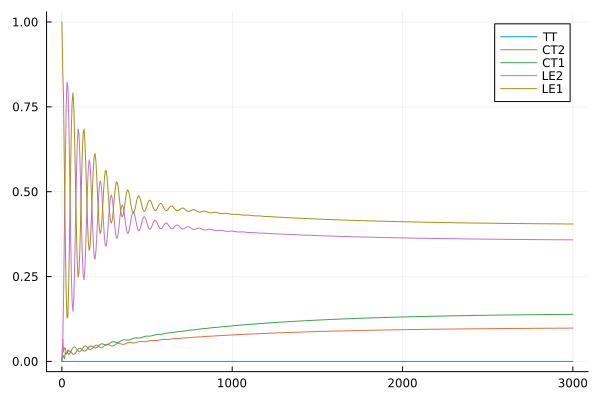

In [75]:
plot(tquapi.*au2fs, real.(ρquapi[:, 5, 5]), label="TT")
plot!(tquapi.*au2fs, real.(ρquapi[:, 4, 4]), label="CT2")
plot!(tquapi.*au2fs, real.(ρquapi[:, 3, 3]), label="CT1")
plot!(tquapi.*au2fs, real.(ρquapi[:, 2, 2]), label="LE2")
plot!(tquapi.*au2fs, real.(ρquapi[:, 1, 1]), label="LE1")

In [11]:
λs = repeat([100.0], 5) * mev2au
γs = repeat([450.0], 5) * mev2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(5, 5)
    op[j, j] = 1.0
    push!(sys_ops, op)
end


times_HEOM, ρs_HEOM = HEOM.propagate(;
                                    Hamiltonian=H0,
                                    ρ0,
                                    β,
                                    dt,
                                    ntimes=nsteps,
                                    Jw=JwH,
                                    sys_ops=sys_ops,
                                    num_modes=3,
                                    Lmax=5)

LoadError: InterruptException:

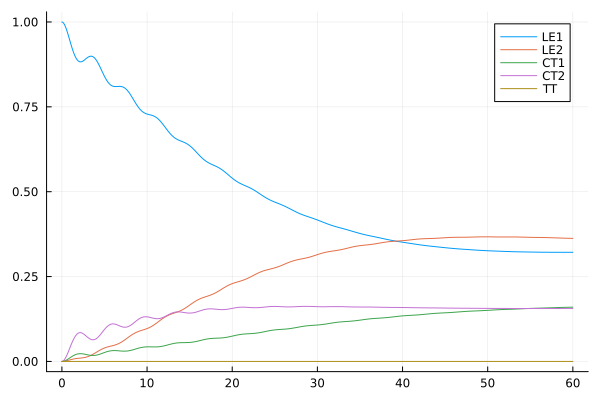

In [12]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="LE1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 2, 2]), label="LE2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 3, 3]), label="CT1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 4, 4]), label="CT2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 5, 5]), label="TT")

In [78]:
times_BRME, ρs_BRME = BlochRedfield.propagate(;
                                            Hamiltonian=H0,
                                            Jw=JwH,
                                            β,
                                            ρ0,
                                            dt,
                                            ntimes=nsteps,
                                            sys_ops)

([0.0, 206.70687287875495, 413.4137457575099, 620.1206186362649, 826.8274915150198, 1033.5343643937747, 1240.2412372725296, 1446.9481101512847, 1653.6549830300396, 1860.3618559087945  …  122163.76187134418, 122370.46874422293, 122577.17561710169, 122783.88248998045, 122990.5893628592, 123197.29623573796, 123404.0031086167, 123610.70998149546, 123817.41685437421, 124024.12372725297], [1.0000000000000002 + 0.0im -5.721291458939605e-17 + 0.0im … 9.88544890789825e-18 + 0.0im -0.0 + 0.0im; 0.8475036466874609 + 3.763929108367819e-16im -0.0335816899614385 - 0.21286125326879218im … -0.20335759801002848 - 0.09478694916687457im 0.01020481968934761 - 0.0016113919654149778im; … ; 0.4250842429209037 - 5.3649589850071095e-18im -0.3542289446497229 - 1.3517016179930777e-5im … -0.034648862917425034 + 9.520217603458968e-7im 4.7791749483705536e-5 + 1.6520716826288365e-5im; 0.42508416732940124 - 5.5368267924984924e-18im -0.35423205271756136 - 1.3355943583257026e-5im … -0.034648575388109254 + 9.38376344372

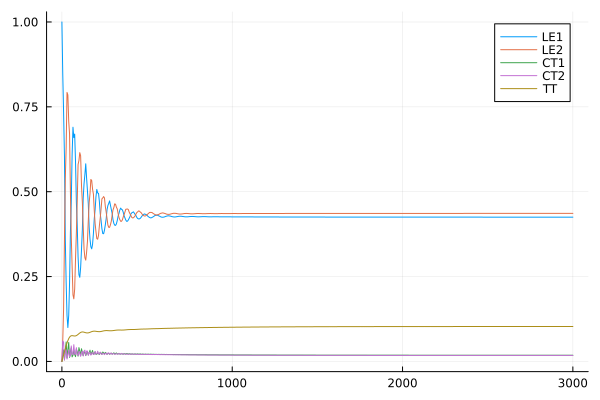

In [79]:
plot(times_BRME.*au2fs, real.(ρs_BRME[:, 1, 1]), label="LE1")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 2, 2]), label="LE2")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 3, 3]), label="CT1")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 4, 4]), label="CT2")
plot!(times_BRME.*au2fs, real.(ρs_BRME[:, 5, 5]), label="TT")